<a href="https://colab.research.google.com/github/leehyeonjin99/BOOSTCAMP_AI_Tech_Study_Diary/blob/main/%ED%95%99%EC%8A%B5%EC%A0%95%EB%A6%AC/Pytorch/Additional_Study/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## XOR 문제 : 단층 퍼셉트론 구현하기
import torch

device='cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [2]:
X=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
y=torch.FloatTensor([[0],[1],[1],[0]]).to(device)

In [3]:
linear=torch.nn.Linear(2,1,bias=True)
sigmoid=torch.nn.Sigmoid()
model=torch.nn.Sequential(linear,sigmoid).to(device)

In [4]:
criterion=torch.nn.BCELoss().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=1)

In [5]:
epochs=10000
for epoch in range(epochs+1):
  hypothesis=model(X)
  cost=criterion(hypothesis, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print(epoch, cost.item())

0 0.7273974418640137
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [15]:
with torch.no_grad():
  hypothesis=model(X)
  predicted=(hypothesis>0.5).float()
  accuracy=(predicted==y).float().mean()
  print("모델의 출력값(Hypothesis) :",hypothesis.detach().cpu().numpy())
  print("모델의 예측값(Predicted) :",predicted.detach().cpu().numpy())
  print("실제값(Y) :", y.cpu().numpy())
  print("정확도(Accuracy) :",accuracy.item())

모델의 출력값(Hypothesis) : [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted) : [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y) : [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy) : 0.5


단층 퍼셉트론으로는 XOR 문제를 해결할 수 없다.

In [18]:
## XOR 문제 : 다층 퍼셉트로 구현하기
import torch
import torch.nn as nn

device='cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model=nn.Sequential(
    nn.Linear(2,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,1,bias=True),
    nn.Sigmoid(),
    ).to(device)

criterion=nn.BCELoss().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=1)
epoch=10000

for epoch in range(epochs):
  hypothesis=model(X)
  cost=criterion(hypothesis, Y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%1000==0:
    print(epoch, cost.item())

0 0.6948983669281006
1000 0.6931380033493042
2000 0.6931171417236328
3000 0.6930763125419617
4000 0.6929102540016174
5000 0.6820821762084961
6000 0.001303493045270443
7000 0.00048387213610112667
8000 0.00028908095555379987
9000 0.00020385441894177347


In [20]:
with torch.no_grad():
  hypothesis=model(X)
  prediction=(hypothesis>0.5).float()
  accuracy=(prediction==Y).float().mean()
  print('모델의 출력값(hypothesis) :',hypothesis.detach().cpu().numpy())
  print('모델의 예측값(prediction) :',prediction.detach().cpu().numpy())
  print('실제값(Y) :',Y.cpu().numpy())
  print('정확도(Accuracy) :',accuracy.item())

모델의 출력값(hypothesis) : [[1.1172806e-04]
 [9.9982870e-01]
 [9.9984217e-01]
 [1.8535313e-04]]
모델의 예측값(prediction) : [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y) : [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy) : 1.0


In [21]:
## 다층 퍼셉트론 : 손글씨 분류
# 0-15의 명암, 8x8=64 pixel 해상도의 흑백이미지

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [23]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [27]:
print(digits.target[0])

0


In [28]:
print('전체 샘플의 수 :', len(digits.images))

전체 샘플의 수 : 1797


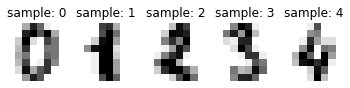

In [29]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [30]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 :',digits.target[i])

0 번 인덱스 샘플의 레이블 : 0
1 번 인덱스 샘플의 레이블 : 1
2 번 인덱스 샘플의 레이블 : 2
3 번 인덱스 샘플의 레이블 : 3
4 번 인덱스 샘플의 레이블 : 4


In [31]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [32]:
X=torch.tensor(digits.data,dtype=torch.float32)
Y=torch.tensor(digits.target, dtype=torch.int64)

model=nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters())
losses=[]
epochs=100

for epoch in range(epochs):
  hypothesis=model(X)
  cost=criterion(hypothesis, Y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%10==0:
    print(f"Epoch : {epoch:4d}/{epochs} Cost {cost.item():.6f}")

  losses.append(cost.item())

Epoch :    0/100 Cost 2.381846
Epoch :   10/100 Cost 2.086940
Epoch :   20/100 Cost 1.844468
Epoch :   30/100 Cost 1.555474
Epoch :   40/100 Cost 1.246410
Epoch :   50/100 Cost 0.968091
Epoch :   60/100 Cost 0.724376
Epoch :   70/100 Cost 0.519714
Epoch :   80/100 Cost 0.380598
Epoch :   90/100 Cost 0.293385


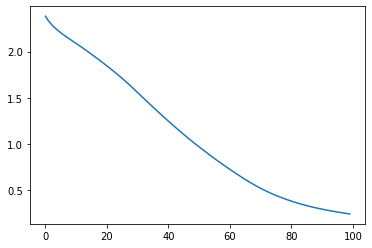

In [34]:
plt.plot(losses)

In [300]:
## 다층 퍼셉트론 : MNIST 분류
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms, utils
% matplotlib inline

In [301]:
mnist_train = torchvision.datasets.MNIST(root='./mnist', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='./mnist', train=False, download=True, transform=torchvision.transforms.ToTensor())

In [302]:
mnist_train.data=torch.Tensor(np.array(mnist_train.data.reshape(-1,28*28)))
mnist_test.data=torch.Tensor(np.array(mnist_test.data.reshape(-1,28*28)))

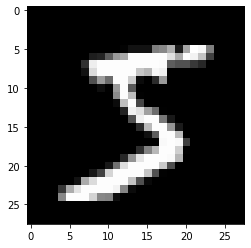

In [303]:
plt.imshow(mnist_train.data[0].reshape(28, 28), cmap='gray')

In [304]:
ds_train=torch.utils.data.TensorDataset(mnist_train.data, mnist_train.targets)
ds_test=torch.utils.data.TensorDataset(mnist_test.data, mnist_test.targets)

In [305]:
loader_train=torch.utils.data.DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test=torch.utils.data.DataLoader(ds_test, batch_size=64, shuffle=True)

In [306]:
from torch import nn

model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3',nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [307]:
from torch import optim

loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.01)

In [308]:
def train(epoch):
  model.train()

  for data, targets in loader_train:
    output=model(data)
    loss=loss_fn(output, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("epoch {} : 완료\n".format(epoch))

In [309]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    with torch.no_grad(): 
        for data, targets in loader_test:
            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    data_num = len(loader_test.dataset)
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [310]:
test()


테스트 데이터에서 예측 정확도: 891/10000 (9%)



In [311]:
for epoch in range(3):
  train(epoch)

test()

epoch 0 : 완료

epoch 1 : 완료

epoch 2 : 완료


테스트 데이터에서 예측 정확도: 8769/10000 (88%)



예측결과 :6
이 이미지 데이터의 정답 레이블은 6입니다


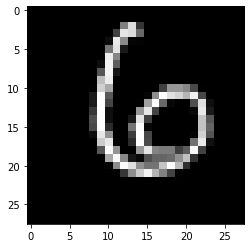

In [325]:
index=100

model.eval()
data=mnist_test.data[index]
output=model(data)
_, predicted=torch.max(output.data, 0)

print('예측결과 :{}'.format(predicted))

X_test_show = (mnist_test.data[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(mnist_test.targets[index]))